# Preprocessing the Scraped Currency Image Data

In [ ]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
#Import the files
from google.colab import files
uploaded=files.upload()

Saving cnnModel.h5 to cnnModel.h5


In [ ]:
#Unzip the file
from zipfile import ZipFile
file_name = 'currencyImages.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#Show the present working directory
!pwd

/content


In [ ]:
#List all the items in the current directory
!ls

 currencyImages.zip  'saudi 10 riyal'	'saudi 20 riyal'   'saudi 5 riyal'
 sample_data	     'saudi 1 riyal'	'saudi 500 riyal'
'saudi 100 riyal'    'saudi 200 riyal'	'saudi 50 riyal'


In [ ]:
#Get the path of the current directory
data_dir="/content"

In [ ]:
#Converting the path into a Windows path object.
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/content')

In [ ]:
#List all the currency images.
list(data_dir.glob('*riyal/*'))

[PosixPath('/content/saudi 20 riyal/14.jpg'),
 PosixPath('/content/saudi 20 riyal/Image_99.JPG'),
 PosixPath('/content/saudi 20 riyal/Image_9.jpg'),
 PosixPath('/content/saudi 20 riyal/Image_67.jpg'),
 PosixPath('/content/saudi 20 riyal/Image_12.jpg'),
 PosixPath('/content/saudi 20 riyal/Image_5.JPG'),
 PosixPath('/content/saudi 20 riyal/Image_41.jpg'),
 PosixPath('/content/saudi 20 riyal/Image_85.jpg'),
 PosixPath('/content/saudi 20 riyal/Image_30.jpg'),
 PosixPath('/content/saudi 20 riyal/56.jpg'),
 PosixPath('/content/saudi 20 riyal/47.jpg'),
 PosixPath('/content/saudi 20 riyal/50.jpg'),
 PosixPath('/content/saudi 20 riyal/32.jpg'),
 PosixPath('/content/saudi 20 riyal/10.jpg'),
 PosixPath('/content/saudi 20 riyal/24.jpg'),
 PosixPath('/content/saudi 20 riyal/41.jpg'),
 PosixPath('/content/saudi 20 riyal/Image_15.jpg'),
 PosixPath('/content/saudi 20 riyal/9.jpg'),
 PosixPath('/content/saudi 20 riyal/18.jpg'),
 PosixPath('/content/saudi 20 riyal/4.jpg'),
 PosixPath('/content/saudi 20 

In [ ]:
#Show total count of the images
image_count=len(list(data_dir.glob('*riyal/*')))
image_count

886

In [ ]:
#Get an example of the currency image and display it.
saudi_100_riyal=list(data_dir.glob('saudi 100 riyal/*'))

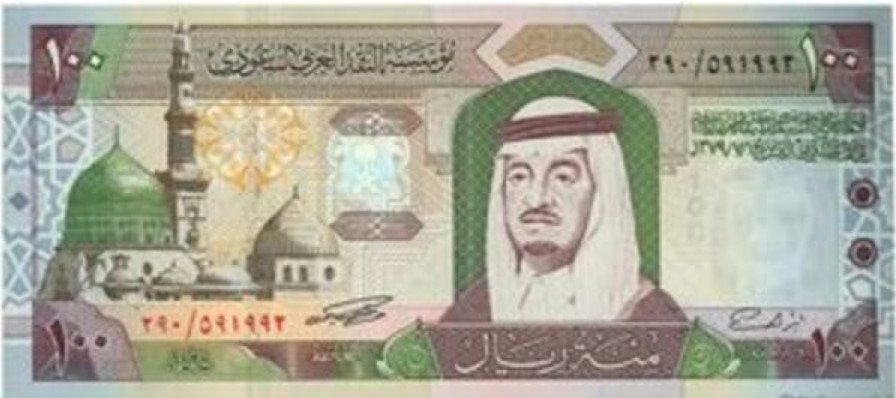

In [ ]:
#Show the images using PILLOW library
PIL.Image.open(str(saudi_100_riyal[1]))

In [ ]:
#Create the images dictionary with mapping the list of all respective paths into the key.
currency_images_dict={
    'saudi_1_riyal':list(data_dir.glob('saudi 1 riyal/*')),
    'saudi_5_riyal':list(data_dir.glob('saudi 5 riyal/*')),
    'saudi_10_riyal':list(data_dir.glob('saudi 10 riyal/*')),
    'saudi_20_riyal':list(data_dir.glob('saudi 20 riyal/*')),
    'saudi_50_riyal':list(data_dir.glob('saudi 50 riyal/*')),
    'saudi_100_riyal':list(data_dir.glob('saudi 100 riyal/*')),
    'saudi_200_riyal':list(data_dir.glob('saudi 200 riyal/*')),
    'saudi_500_riyal':list(data_dir.glob('saudi 500 riyal/*'))

}

In [ ]:
#Create the class names.
currency_labels_dict={
    'saudi_1_riyal':0,
    'saudi_5_riyal':1,
    'saudi_10_riyal':2,
    'saudi_20_riyal':3,
    'saudi_50_riyal':4,
    'saudi_100_riyal':5,
    'saudi_200_riyal':6,
    'saudi_500_riyal':7
}

In [ ]:
#Convert an example image into a numpy array using OpenCV cv2
#Get the string path of the image, as cv2 does not accept the Windows path
str_path=str(currency_images_dict['saudi_1_riyal'][0])
img=cv2.imread(str_path)
img

array([[[253, 253, 255],
        [251, 251, 255],
        [248, 248, 254],
        ...,
        [243, 246, 250],
        [241, 243, 244],
        [245, 247, 248]],

       [[250, 250, 255],
        [238, 241, 246],
        [236, 236, 242],
        ...,
        [230, 233, 237],
        [226, 230, 231],
        [233, 235, 236]],

       [[249, 252, 255],
        [232, 236, 241],
        [227, 230, 235],
        ...,
        [214, 219, 222],
        [220, 224, 225],
        [227, 231, 232]],

       ...,

       [[241, 244, 248],
        [220, 225, 228],
        [208, 212, 217],
        ...,
        [221, 226, 227],
        [207, 212, 213],
        [174, 182, 182]],

       [[243, 245, 246],
        [232, 236, 237],
        [224, 227, 231],
        ...,
        [182, 187, 188],
        [182, 187, 188],
        [168, 174, 173]],

       [[246, 248, 249],
        [239, 241, 242],
        [233, 236, 240],
        ...,
        [151, 155, 156],
        [155, 161, 160],
        [153, 159, 158]]

In [ ]:
#Showing the shape of the example image
img.shape

(278, 610, 3)

In [ ]:
#Show how many images are there in each category
for currency,images in currency_images_dict.items():
  print(currency)
  print(len(images))

saudi_1_riyal
116
saudi_5_riyal
128
saudi_10_riyal
106
saudi_20_riyal
97
saudi_50_riyal
135
saudi_100_riyal
127
saudi_200_riyal
68
saudi_500_riyal
109


In [ ]:
#Resize each of the images into 224 x 224
X, y = [], []

for currency_name, images in currency_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        #Need to resize all the images to same shape, as the images are having different shape.
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(currency_labels_dict[currency_name])

In [ ]:
#Converting X and y to numpy array
X = np.array(X)
y = np.array(y)

In [ ]:
#Saving the array format of the prepared dataset
np.savez("CurrencyImage",x=X,y=y)

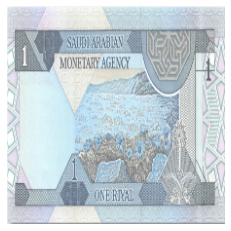

In [ ]:
#Showing an image after resizing
plt.axis('off')
plt.imshow(X[0])

In [ ]:
#Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#Scale the features
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Creating the data augmentation with flipping, rotation and zooming.

In [ ]:
#Data Augmentation is done to avoid overfitting
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# CNN Model With a Data Augmentation Layer

In [ ]:
num_classes = 8

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
#Training the model with a validation split of 0.1
model.fit(X_train_scaled, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
19/19 [==============================] - 30s 2s/step - loss: 4.1283 - accuracy: 0.1719 - val_loss: 2.0711 - val_accuracy: 0.1642
Epoch 2/30
19/19 [==============================] - 29s 2s/step - loss: 2.0794 - accuracy: 0.1418 - val_loss: 2.0534 - val_accuracy: 0.1045
Epoch 3/30
19/19 [==============================] - 29s 2s/step - loss: 2.0600 - accuracy: 0.1528 - val_loss: 1.9857 - val_accuracy: 0.2388
Epoch 4/30
19/19 [==============================] - 30s 2s/step - loss: 2.0012 - accuracy: 0.1864 - val_loss: 1.8640 - val_accuracy: 0.2239
Epoch 5/30
19/19 [==============================] - 29s 2s/step - loss: 1.8836 - accuracy: 0.2691 - val_loss: 1.6181 - val_accuracy: 0.4478
Epoch 6/30
19/19 [==============================] - 29s 2s/step - loss: 1.6503 - accuracy: 0.3913 - val_loss: 1.3571 - val_accuracy: 0.4925
Epoch 7/30
19/19 [==============================] - 29s 2s/step - loss: 1.5198 - accuracy: 0.4203 - val_loss: 1.2323 - val_accuracy: 0.5970
Epoch 8/30
19/19 [==

In [ ]:
#Showing the model architecture
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 28, 28, 64)       

In [ ]:
#Evaluating the model on the test data
model.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 3s 429ms/step - loss: 0.8172 - accuracy: 0.8288


[0.8171688318252563, 0.8288288116455078]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[2.09308541e-06, 9.44997292e-12, 8.60338446e-07, ...,
        9.99722064e-01, 2.76692379e-13, 3.19419860e-06],
       [1.64787652e-05, 9.97658849e-01, 1.45176762e-06, ...,
        1.87158628e-04, 1.64146130e-07, 2.10996903e-03],
       [5.18049092e-05, 9.56817416e-07, 5.24192692e-05, ...,
        6.81258913e-04, 9.98796344e-01, 3.17447650e-08],
       ...,
       [1.40658394e-01, 1.03654520e-06, 1.04218675e-02, ...,
        8.39752257e-01, 8.11944995e-03, 2.75084540e-06],
       [9.99865770e-01, 1.30143177e-04, 6.18129270e-10, ...,
        3.25556520e-15, 8.98598262e-09, 3.00094172e-07],
       [9.60904956e-01, 7.45255662e-08, 4.75182571e-03, ...,
        3.37595604e-02, 2.07636025e-04, 2.17385808e-04]], dtype=float32)

In [ ]:
#Random checking of a test prediction
np.argmax(predictions[90])

4

In [ ]:
y_test[90]

4

In [ ]:
#Saving the trained model
model.save('cnnModel.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('cnnModel.h5')

In [ ]:
#Taking a random image form the test set and predicting the result.
def prepare(filename):
  img_array=cv2.imread(filename)
  resized_img = cv2.resize(img_array,(224,224))
  X = np.array(resized_img)
  return resized_img.reshape(-1,224,224,3)

prediction=loaded_model.predict(prepare('1.jpg'))

In [ ]:
prediction

array([[0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)